In [1]:
# 3.1 Import Libraries
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import lightgbm as lgb

#Common Model Helpers
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

pd.set_option('display.max_columns', 100)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import gc
gc.enable() # ガベージコレクション 

Python version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.3
matplotlib version: 3.1.1
NumPy version: 1.17.4
SciPy version: 1.3.1
IPython version: 7.9.0
scikit-learn version: 0.21.3
-------------------------


In [2]:
import codecs
with codecs.open("train.csv", "r", "Shift-JIS", "ignore") as file:
    df1 = pd.read_csv(file)

with codecs.open("valid.csv", "r", "UTF-8", "ignore") as file:
    df2 = pd.read_csv(file)
# train = pd.read_csv('train.csv','utf-8')
# test  = pd.read_csv('valid.csv','utf-8')


train = df1
test_x = df2

train_x = train.drop(['１２ヶ月事故'], axis=1)
train_y = train['１２ヶ月事故']
print(train_y.shape)
# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()
print(train.shape)

# 学習データとテストデータを返す関数
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

(16641,)
(16641, 39)


In [3]:
test_x

,申込年月日,申込時間,【媒体コード】大項目,【媒体コード】詳細項目,受付時間帯区分,受付形態区分,新規時自動契約機店番,取扱店番,管理店番,性別,年齢,生年月日,ＪＩＳ住所コード,独既区分,新職種区分,【新職種区分】大項目,【新職種区分】詳細項目,雇用形態区分,就業形態区分,会社規模区分,合計年収,在社月数,住居区分,居住月数,家賃負担額,家族構成区分,保険職種区分,収入証明有無,独身内訳,同居区分,扶養家族数,扶養家族子供数,所得証明区分,名義区分,事業形態区分,事業所有無,貸付年月日
0,2015-04-13,130741,3,25,0,502,0,5,5,2,38,1976-07-27,46215,2,840,8,840,2,1,7,1000000,180,4,12,69000,2,1,0,0,1,3,1,0,0,0,0,2015-04-15
1,2015-04-15,123609,1,99,0,1,383,383,5,2,30,1985-03-20,46491,1,140,1,140,5,1,1,1200000,19,8,2,0,4,1,0,0,1,0,0,0,3,0,0,2015-04-15
2,2015-04-30,181535,4,99,0,1801,552,552,5,1,22,1992-11-09,45205,1,631,6,631,2,1,8,2040000,15,4,47,0,4,3,0,1,1,0,0,0,0,0,0,2015-05-01
3,2015-05-12,115947,5,99,0,101,0,5,5,1,59,1956-03-25,46222,2,1501,15,1501,1,1,9,2000000,59,4,386,50000,1,4,0,0,1,1,0,0,0,9,0,2015-05-25
4,2015-05-14,175151,5,99,0,1,1414,1414,5,2,46,1968-07-05,46220,1,209,2,209,4,1,8,1500000,14,8,62,0,4,3,0,0,1,1,1,0,3,0,0,2015-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2018-07-04,124919,1,99,0,5,0,1437,1437,1,22,1996-06-22,26103,1,540,5,540,4,1,8,1800000,23,4,184,0,4,3,0,0,1,0,0,0,0,0,0,2018-07-04
3496,2018-07-24,233917,1,99,0,1701,0,1437,1437,2,20,1998-01-25,29201,1,1328,13,1328,3,1,6,3120000,15,8,218,0,4,3,0,0,1,0,0,0,3,0,0,2018-07-26
3497,2018-07-17,144546,2,24,0,1701,0,1437,1437,2,61,1957-07-06,25204,2,1140,11,1140,4,1,2,7846000,148,1,125,0,1,3,1,0,1,1,0,3,1,0,0,2018-08-10
3498,2018-08-09,173804,5,99,0,101,2560,2560,1437,1,55,1963-01-20,29206,1,840,8,840,4,1,5,2100000,12,4,62,35000,4,1,0,0,1,1,0,0,0,0,0,2018-08-10


In [4]:
# plt.figure(figsize=(20, 10))
# sns.lineplot(x='申込年月日',y='１２ヶ月事故',data=train)
# plt.xticks(rotation=90) # 値の表示が横だったのを90°回転させて縦になる
# plt.title('time-accident')

(array([14098.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2543.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

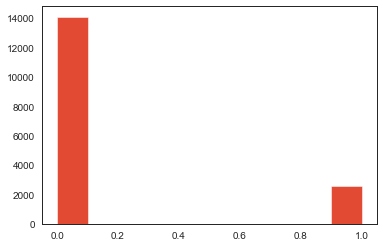

In [5]:
plt.hist(train['１２ヶ月事故'])

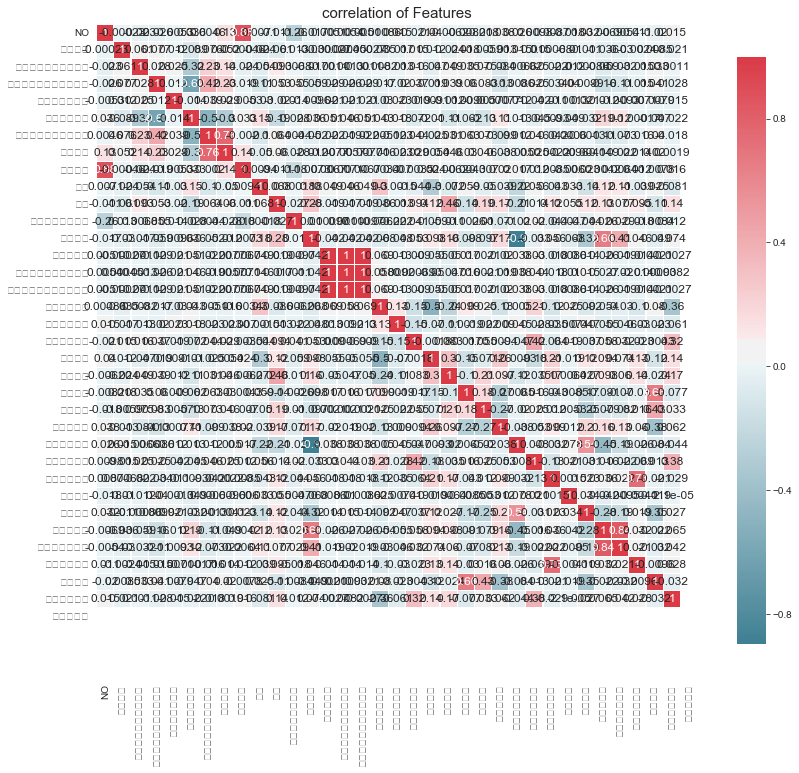

In [6]:
# 相関分析Heatmap
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'c:\Windows\Fonts\meiryo.ttc')

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    ax.set_ylim(len(df.columns), 0)
    plt.title('correlation of Features', y=1.05, size=15)

correlation_heatmap(train_x)

In [7]:
print(train_x.shape)
train_x

(16641, 38)


,NO,申込年月日,申込時間,【媒体コード】大項目,【媒体コード】詳細項目,受付時間帯区分,受付形態区分,新規時自動契約機店番,取扱店番,管理店番,性別,年齢,生年月日,ＪＩＳ住所コード,独既区分,新職種区分,【新職種区分】大項目,【新職種区分】詳細項目,雇用形態区分,就業形態区分,会社規模区分,合計年収,在社月数,住居区分,居住月数,家賃負担額,家族構成区分,保険職種区分,収入証明有無,独身内訳,同居区分,扶養家族数,扶養家族子供数,所得証明区分,名義区分,事業形態区分,事業所有無,貸付年月日
0,1000001,2015/3/7,53518,3,24,1,502,0,5,5,1,55,1960/4/10,45201,2,209,2,209,1,1,9,2700000,10,8,30,0,2,4,0,0,1,2,0,0,3,9,0,2015/10/22
1,1000002,2015/4/7,171708,3,9,0,1801,0,5,5,1,23,1992/4/7,46505,2,1340,13,1340,4,1,5,2140000,21,5,1,20000,2,1,0,0,1,3,1,0,0,0,0,2015/4/9
2,1000003,2015/4/9,154859,3,4,0,1701,0,5,5,1,36,1979/1/14,45383,2,1340,13,1340,2,1,4,4956000,144,8,82,0,2,1,1,0,1,2,0,1,3,0,0,2015/4/10
3,1000005,2015/4/13,131704,1,99,0,101,434,434,5,1,22,1993/4/13,46215,1,506,5,506,2,1,6,2300000,28,4,84,1000,4,1,0,0,1,0,0,0,0,0,0,2015/4/14
4,1000007,2015/4/16,203053,3,9,0,502,0,5,5,1,36,1979/3/15,46201,1,940,9,940,2,1,2,4500000,0,4,1,55000,5,1,0,0,2,0,0,0,0,0,0,2015/4/17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,1020137,2018/8/27,121219,5,99,0,1,3134,3134,1437,1,31,1986/12/23,25206,2,308,3,308,1,1,9,3600000,39,2,45,60000,1,4,0,0,1,1,0,0,2,1,0,2018/8/27
16637,1020138,2018/8/27,151320,4,2,0,1701,0,1437,1437,1,51,1967/2/14,26107,2,240,2,240,2,1,4,5500000,196,4,124,90000,3,1,0,0,1,4,2,0,0,0,0,2018/8/27
16638,1020139,2018/8/26,202003,4,2,3,1801,0,1437,1437,1,32,1986/8/4,26202,1,640,6,640,2,1,7,3000000,3,8,213,0,4,1,0,0,1,0,0,0,3,0,0,2018/8/27
16639,1020140,2018/8/29,184334,3,8,0,502,0,1437,1437,1,27,1991/8/12,26102,1,540,5,540,4,1,6,2400000,0,4,22,65000,5,1,0,0,2,0,0,0,0,0,0,2018/8/30


In [56]:
train_x, test_x = load_data()

# JIS住所コード→都道府県コードに変換
# train_x['ＪＩＳ住所コード'] = train_x['ＪＩＳ住所コード'].apply(lambda code: str(code)[:2] if code > 9999 else "0{}".format(code)[:2])
train_x['ＪＩＳ住所コード'] = train_x['ＪＩＳ住所コード'].apply(lambda code: float(code / 1000))

drop_cols = ['NO',
             '申込年月日',
             '申込時間',
             '生年月日',
             '事業所有無',
             '新規時自動契約機店番',
             '新職種区分',
             '【新職種区分】詳細項目',
             '【媒体コード】大項目',
             '【媒体コード】詳細項目', 
             '所得証明区分',
             '扶養家族数',
             '貸付年月日',
#              追加する
             '住居区分',
             '独身内訳',
             '就業形態区分',
             '同居区分',
             '性別',
            ]
train_x = train_x.drop(drop_cols, axis=1)

change_cols = {
    '申込年月日': 'Application date',
    '申込時間': 'Application time',
    '事業所有無': 'have office',    
    '生年月日': 'birthday',
    '事業所有無': 'zigyosyo umu',
    '新規時自動契約機店番': 'sinkizi zidoukeiyaku',
    '【媒体コード】大項目': 'baitai big',
    '【媒体コード】詳細項目': 'baitai detail',
    '所得証明区分': 'syotoku syoumei',
    '扶養家族数': 'huyou kazoku',
    '貸付年月日' : 'taihu nenn gappi',   
    '受付時間帯区分': 'Recieve period classification',
    '受付形態区分': 'Recieve pattern classification',
    '取扱店番': 'Store id',
    '管理店番': 'Management store id',
    '性別': 'Sex',
    '年齢': 'Age',
    'ＪＩＳ住所コード': 'JIS code',
    '独既区分': 'marriage',
    '新職種区分': 'job classification',
    '【新職種区分】大項目': 'job classification (big)',
    '【新職種区分】詳細項目': 'job classification (detail)',
    '雇用形態区分': 'Employment type classification',
    '就業形態区分': 'Work type classification',
    '会社規模区分': 'Company size classification',
    '合計年収': 'Total income',
    '在社月数': 'Number of months in office',
    '住居区分': 'Residential division',
    '居住月数': 'Months of residence',
    '家賃負担額': 'Rent burden',
    '家族構成区分': 'family structure',
    '保険職種区分': 'Insurance occupation classification',
    '収入証明有無': 'Proof of income',
    '独身内訳': 'Single',
    '同居区分': 'Living together',
    '扶養家族子供数': 'Dependent children',
    '名義区分': 'Name classification',
    '事業形態区分': 'Business type classification'               
}
train_x = train_x.rename(columns = change_cols)

# # 申込時間を変換(HH:MM:SS → HH)
# train_x['Application time'] = train_x['Application time'].apply(lambda time: int(time / 10000))
# # 申込年月日を変換
# train_x['Application month'] = pd.to_datetime(train_x['Application date']).apply(lambda date: date.month)
# train_x['Application day'] = pd.to_datetime(train_x['Application date']).apply(lambda date: date.day)
# train_x = train_x.drop('Application date', axis=1)

train_x['rent ratio'] = (train_x['Rent burden'] * 12) / train_x['Total income']


 
# train_x['Total income'] = np.log1p(train_x['Total income']) #対数変換

# testも同じように前処理
test_x['ＪＩＳ住所コード'] = train['ＪＩＳ住所コード'].apply(lambda code: float(code / 1000))
drop_cols.remove('NO')
test_x = test_x.drop(drop_cols, axis=1)
test_x = test_x.rename(columns = change_cols)


test_x['rent ratio'] = (test_x['Rent burden'] * 12) / test_x['Total income']
# test_x['Total income'] = np.log1p(test_x['Total income']) # 対数変換

#  # 申込時間を変換(HH:MM:SS → HH)
# test_x['Application time'] = test_x['Application time'].apply(lambda time: int(time / 10000))
# # 申込年月日を変換
# test_x['Application month'] = pd.to_datetime(test_x['Application date']).apply(lambda date: date.month)
# test_x['Application day'] = pd.to_datetime(test_x['Application date']).apply(lambda date: date.day)
# test_x = test_x.drop('Application date', axis=1)

test_x

,Recieve period classification,Recieve pattern classification,Store id,Management store id,Age,JIS code,marriage,job classification (big),Employment type classification,Company size classification,Total income,Number of months in office,Months of residence,Rent burden,family structure,Insurance occupation classification,Proof of income,Dependent children,Name classification,Business type classification,rent ratio
0,0,502,5,5,38,45.201,2,8,2,7,1000000,180,12,69000,2,1,0,1,0,0,0.828
1,0,1,383,5,30,46.505,1,1,5,1,1200000,19,2,0,4,1,0,0,3,0,0.000
2,0,1801,552,5,22,45.383,1,6,2,8,2040000,15,47,0,4,3,0,0,0,0,0.000
3,0,101,5,5,59,46.215,2,15,1,9,2000000,59,386,50000,1,4,0,0,0,9,0.300
4,0,1,1414,5,46,46.201,1,2,4,8,1500000,14,62,0,4,3,0,1,3,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,5,1437,1437,22,18.202,1,5,4,8,1800000,23,184,0,4,3,0,0,0,0,0.000
3496,0,1701,1437,1437,20,17.201,1,13,3,6,3120000,15,218,0,4,3,0,0,3,0,0.000
3497,0,1701,1437,1437,61,16.201,2,11,4,2,7846000,148,125,0,1,3,1,0,1,0,0.000
3498,0,101,2560,1437,55,17.201,1,8,4,5,2100000,12,62,35000,4,1,0,0,0,0,0.200


In [57]:
# train_x['mean income'] = train_x['Total income'].mean() - train_x['Total income']
# train_x['mean Number of months in office'] = train_x['Number of months in office'].mean() - train_x['Number of months in office']

# test_x['mean income'] = train_x['Total income'].mean() - test_x['Total income']
# test_x['mean Number of months in office'] = train_x['Number of months in office'].mean() - test_x['Number of months in office']

(16641, 21)
(3500, 21)


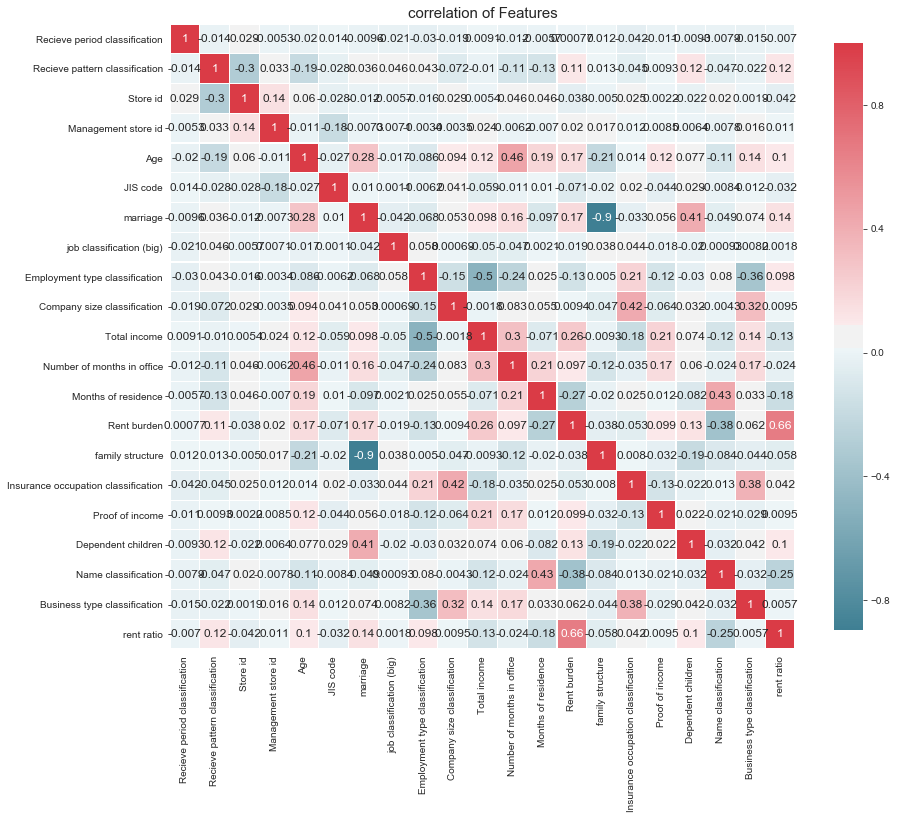

In [58]:
correlation_heatmap(train_x)

print(train_x.shape)
print(test_x.shape)

In [85]:
# Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=546789)

def train_model(data_, test_, y_, folds_):
    oof_preds = np.zeros(data_.shape[0])
    sub_preds = np.zeros(test_.shape[0])
    
    feature_importance_df = pd.DataFrame()
    
    feats = [f for f in data_.columns]
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(data_)):
        trn_x, trn_y = data_[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = data_[feats].iloc[val_idx], y_.iloc[val_idx]
        

#         clf = LGBMClassifier(
#             n_estimators=4000, #n_estimatorsは構築する決定木の数
#             learning_rate=0.02, #各ステップの重みを縮小することにより、モデルをより堅牢にする よく使用される値：0.01〜0.2
#             num_leaves=30,
#             colsample_bytree=.8,
#             subsample=.9,
#             max_depth=-1, #7程度から始めるのがよくある。深さを増やすと学習率が上がるが、学習に時間がかかる。
#             reg_alpha=.1,
#             reg_lambda=.1,
#             min_split_gain=.01,
#             min_child_weight=10, #過最小値である0に設定すると、モデルの制約が緩和され、学習しやすくなる。増加することで過学習を減らす。最適な値は0,5,15,300あたり。
#         )
        clf = LGBMClassifier(
            n_estimators=1000, #n_estimatorsは構築する決定木の数    4000
            learning_rate=0.015, #各ステップの重みを縮小することにより、モデルをより堅牢にする よく使用される値：0.01〜0.2
            num_leaves=40,
            colsample_bytree=0.7,   # 0.8
            subsample=0.8,    # 0.9
            max_depth=-1, #7程度から始めるのがよくある。深さを増やすと学習率が上がるが、学習に時間がかかる。
            reg_alpha=0.1,    # 0.1
            reg_lambda=0.1,   # 0.1
            min_split_gain=0.01,
            min_child_weight=0, #過最小値である0に設定すると、モデルの制約が緩和され、学習しやすくなる。増加することで過学習を減らす。最適な値は0,5,15,300あたり。
            min_child_samples=20  # (int, optional (default=20)) – Minimum number of data needed in a child (leaf).
        )
        
        clf.fit(trn_x, trn_y, 
                eval_set= [(trn_x, trn_y), (val_x, val_y)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=100  # aucを目的関数, 
               )
        
        oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_[feats], num_iteration=clf.best_iteration_)[:, 1] / folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
        del clf, trn_x, trn_y, val_x, val_y
        gc.collect()
        
    print('Full AUC score %.6f' % roc_auc_score(y_, oof_preds)) 
    
    test_['TARGET'] = sub_preds
    
    return oof_preds, test_[['TARGET']], feature_importance_df
# Train model and get oof and test predictions
oof_preds, test_preds, importances = train_model(train_x, test_x, train_y, folds)


Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.815831	training's binary_logloss: 0.371045	valid_1's auc: 0.702396	valid_1's binary_logloss: 0.401066
[200]	training's auc: 0.850218	training's binary_logloss: 0.342788	valid_1's auc: 0.702939	valid_1's binary_logloss: 0.394994
Early stopping, best iteration is:
[154]	training's auc: 0.834844	training's binary_logloss: 0.354457	valid_1's auc: 0.703905	valid_1's binary_logloss: 0.396575
Fold  1 AUC : 0.703905
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.812807	training's binary_logloss: 0.373427	valid_1's auc: 0.720676	valid_1's binary_logloss: 0.394551
[200]	training's auc: 0.848954	training's binary_logloss: 0.345613	valid_1's auc: 0.725501	valid_1's binary_logloss: 0.385877
[300]	training's auc: 0.880905	training's binary_logloss: 0.324708	valid_1's auc: 0.726447	valid_1's binary_logloss: 0.38319
[400]	training's auc: 0.907089	training's binary_logloss: 0.307

In [92]:
# Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=546789)

def train_model(data_, test_, y_, folds_):
    oof_preds = np.zeros(data_.shape[0])
    sub_preds = np.zeros(test_.shape[0])
    
    feature_importance_df = pd.DataFrame()
    
    feats = [f for f in data_.columns]
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(data_)):
        trn_x, trn_y = data_[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = data_[feats].iloc[val_idx], y_.iloc[val_idx]
        
        clf =  XGBClassifier(
                    learning_rate =0.01,
                    n_estimators=4000,
                    max_depth=7,
                    min_child_weight=10,
                    gamma=0,
                    subsample=0.9,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=6,
                    scale_pos_weight=1,
                    seed=27
                 )
        
        clf.fit(trn_x, trn_y, 
                eval_set= [(trn_x, trn_y), (val_x, val_y)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=100  # aucを目的関数, 
               )
        
        oof_preds[val_idx] = clf.predict_proba(val_x)[:, 1]
        sub_preds += clf.predict_proba(test_[feats])[:, 1] / folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
        del clf, trn_x, trn_y, val_x, val_y
        gc.collect()
        
    print('Full AUC score %.6f' % roc_auc_score(y_, oof_preds)) 
    
    test_['TARGET'] = sub_preds
    
    return oof_preds, test_[['TARGET']], feature_importance_df
# Train model and get oof and test predictions
oof_preds, test_preds, importances = train_model(train_x, test_x, train_y, folds)


[0]	validation_0-auc:0.707982	validation_1-auc:0.643644
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.815658	validation_1-auc:0.699095
[200]	validation_0-auc:0.835251	validation_1-auc:0.702316
[300]	validation_0-auc:0.849991	validation_1-auc:0.704024
[400]	validation_0-auc:0.862643	validation_1-auc:0.70406
Stopping. Best iteration:
[339]	validation_0-auc:0.854942	validation_1-auc:0.70448

Fold  1 AUC : 0.704480
[0]	validation_0-auc:0.697695	validation_1-auc:0.635933
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.814035	validation_1-auc:0.721687
[200]	validation_0-auc:0.833996	validation_1-auc:0.725206
[300]	validation_0-auc:0.848005	validation_1-auc:0.727938
[400]	validation_0-auc:0.86158	validation_1-auc:0.728876
[50

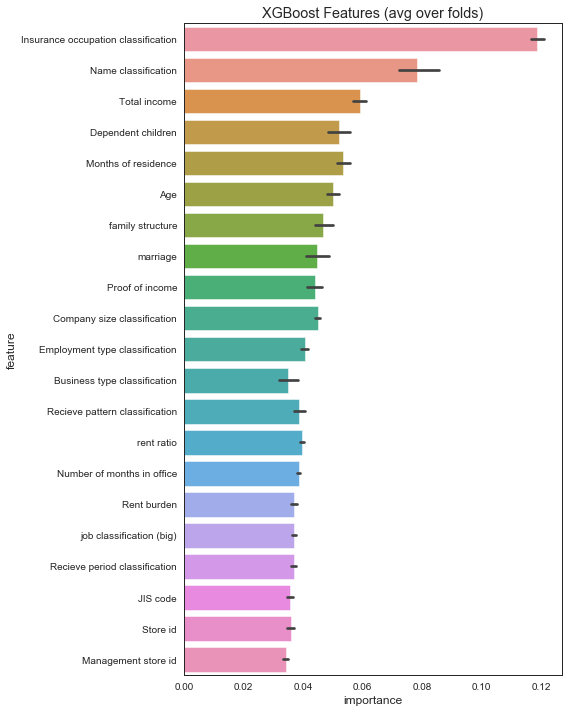

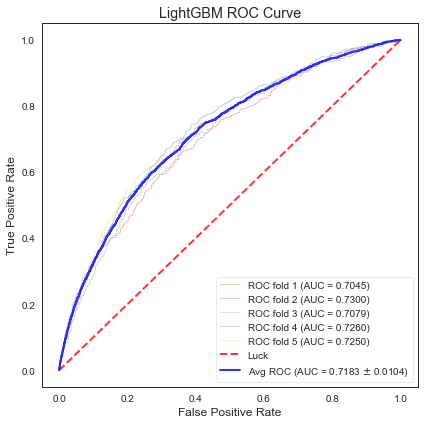

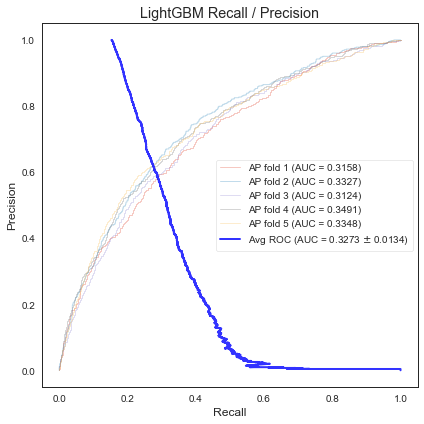

In [95]:
def display_importances(feature_importance_df_):
    # Plot feature importances
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:50].index
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(8,10))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('XGBoost Features (avg over folds)')
    plt.tight_layout()
#     plt.savefig('lgbm_importances.png')


def display_roc_curve(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = roc_auc_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    fpr, tpr, thresholds = roc_curve(y_, oof_preds_)
    score = roc_auc_score(y_, oof_preds_)
    plt.plot(fpr, tpr, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LightGBM ROC Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    
#     plt.savefig('roc_curve.png')


def display_precision_recall(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = average_precision_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='AP fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    precision, recall, thresholds = precision_recall_curve(y_, oof_preds_)
    score = average_precision_score(y_, oof_preds_)
    plt.plot(precision, recall, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('LightGBM Recall / Precision')
    plt.legend(loc="best")
    plt.tight_layout()
    
#     plt.savefig('recall_precision_curve.png')

    
# Display a few graphs
folds_idx = [(trn_idx, val_idx) for trn_idx, val_idx in folds.split(train_x)]
display_importances(feature_importance_df_=importances)
display_roc_curve(y_=train_y, oof_preds_=oof_preds, folds_idx_=folds_idx)
display_precision_recall(y_=train_y, oof_preds_=oof_preds, folds_idx_=folds_idx)

# Save test predictions
oof_preds = pd.Series(oof_preds)
oof_preds.to_csv('train_output1.csv', index=False)
test_preds.to_csv('valid-output1.csv', index=False)

In [ ]:
# Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=546789)

from catboost import CatBoostClassifier

def train_model_2(data_, test_, y_, folds_):
    oof_preds = np.zeros(data_.shape[0])
    sub_preds = np.zeros(test_.shape[0])
    
    feature_importance_df = pd.DataFrame()
    
    feats = [f for f in data_.columns]
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(data_)):
        trn_x, trn_y = data_[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = data_[feats].iloc[val_idx], y_.iloc[val_idx]
    
        cat_features = [0,1]
        clf = CatBoostClassifier(iterations=5000, 
                                 learning_rate=0.03, 
                                 depth=7,
                                 use_best_model=True,
#                                  loss_function='AUC'
                                 eval_metric = 'AUC'
                                 )
#         CatBoostClassifier(iterations=2,  loss_function='Logloss')
        
        clf.fit(trn_x, trn_y, 
                eval_set= [(trn_x, trn_y), (val_x, val_y)], 
                cat_features=cat_features, verbose=100, early_stopping_rounds=100  # aucを目的関数, 
               )
        
        oof_preds[val_idx] = clf.predict(val_x)
        sub_preds += clf.predict(test_[feats]) / folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
        del clf, trn_x, trn_y, val_x, val_y
        gc.collect()
        
    print('Full AUC score %.6f' % roc_auc_score(y_, oof_preds)) 
    
    test_['TARGET'] = sub_preds
    return oof_preds, test_[['TARGET']], feature_importance_df
# Train model and get oof and test predictions
oof_preds, test_preds, importances = train_model_2(train_x, test_x, train_y, folds)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.])

In [80]:
from sklearn.model_selection import GridSearchCV

def grid_search(train_x, test_x, train_y):
    param_grid = {
        "learning_rate" : np.linspace(0.01, 0.03, 3),
        "max_depth" : np.linspace(7, 12, 6, dtype='int64'),
        'min_child_weight': np.linspace(5, 10, 5, dtype='int64'),        
    }
    clf = XGBClassifier(
                    learning_rate =0.01,
                    n_estimators=4000,
                    max_depth=7,
                    min_child_weight=10,
                    gamma=0,
                    subsample=0.9,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=6,
                    scale_pos_weight=1,
                    seed=27
            )
    grid_result = GridSearchCV(
        estimator = clf,
        param_grid = param_grid,
        scoring = 'roc_auc',
        cv = 3,
        verbose=3,
        return_train_score = True
    )
    grid_result.fit(train_x, train_y)
    print(grid_result.best_estimator_)
    print(grid_result.best_params_)
    print(grid_result.best_score_)


grid_search(train_x, test_x, train_y)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] learning_rate=0.01, max_depth=7, min_child_weight=5 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_depth=7, min_child_weight=5, score=(train=0.999, test=0.687), total=  50.3s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=5 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.5s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=7, min_child_weight=5, score=(train=1.000, test=0.650), total=  54.3s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=5 .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=7, min_child_weight=5, score=(train=0.999, test=0.653), total=  53.5s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=7, min_child_weight=6, score=(train=0.998, test=0.687), total=  52.4s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=7, min_child_weight=6, score=(train=0.999, test=0.652), total=  52.0s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=7, min_child_weight=6, score=(train=0.998, test=0.654), total=  52.1s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=7 .............
[CV]  learning_rate=0.01, max_depth=7, min_child_weight=7, score=(train=0.997, test=0.689), total=  53.0s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=7 .............
[CV]  learning_rate=0.01, max_depth=7, min_child_weight=7, score=(train=0.998, test=0.653), total=  54.4s
[CV] lear

KeyboardInterrupt: 

In [ ]:
# # # ヒートマップ
# _df = train.copy()
# _df1 = _df[_df['１２ヶ月事故'] == 1]
# _df2 = _df[_df['１２ヶ月事故'] == 0]
# _df1.hist(figsize=(16, 16), color="#F8766D", alpha=.5)
# _df2.hist(figsize=(16, 16), color="#66FF6D", alpha=.5)

In [ ]:
# _df = test_x.copy()
# _df1 = _df
# _df1.hist(figsize=(16, 16), color="#F8766D", alpha=.5)

# # ヒートマップ
# train = train.drop(['NO'], axis=1)
# _df = train.copy()
# _df1 = _df
# _df1.hist(figsize=(16, 16), color="#44FF6D", alpha=.5)

In [ ]:
# -----------------------------------------
# 標準化 （trainでの標準化⇒tranとtestに適用）
# -----------------------------------------
# -----------------------------------
from sklearn.preprocessing import StandardScaler

def standard_scaler(train_x, test_x, num_cols):
    # 学習データに基づいて複数列の標準化を定義
    scaler = StandardScaler()
    scaler.fit(train_x[num_cols])

    # 変換後のデータで各列を置換
    train_x[num_cols] = scaler.transform(train_x[num_cols])
    test_x[num_cols] = scaler.transform(test_x[num_cols])
    
    return train_x, test_x


# 使い方
# ①変換する数値変数をリストに格納
num_cols = ['Total income']
# # ②関数に代入
# train_x, test_x = standard_scaler(train_x, test_x, num_cols)

train_x['Total income'] = np.log1p(train_x['Total income'])
plt.hist(train_x['Total income']) #表示して確認まで

In [ ]:
# JIS住所コード→都道府県コードに変換
# train_x['ＪＩＳ住所コード'] = train_x['ＪＩＳ住所コード'].apply(lambda code: str(code)[:2] if code > 9999 else "0{}".format(code)[:2])
train['ＪＩＳ住所コード'] = train['ＪＩＳ住所コード'].apply(lambda code: float(code / 1000))

drop_cols = ['NO',
             '申込年月日',
             '申込時間',
             '生年月日',
             '事業所有無',
             '新規時自動契約機店番',
             '新職種区分',
             '【新職種区分】詳細項目',
             '【媒体コード】大項目',
             '【媒体コード】詳細項目', 
             '所得証明区分',
             '扶養家族数',
             '貸付年月日',
#              追加する
             '住居区分',
             '独身内訳',
             '就業形態区分',
             '同居区分',
             '性別'
            ]
train = train.drop(drop_cols, axis=1)

change_cols = {
#     '申込年月日': 'Application date',
#     '申込時間': 'Application time',
#     '事業所有無': 'have office',    
#     '生年月日': 'birthday',
#     '事業所有無': 'zigyosyo umu',
#     '新規時自動契約機店番': 'sinkizi zidoukeiyaku',
#     '【媒体コード】大項目': 'baitai big',
#     '【媒体コード】詳細項目': 'baitai detail',
#     '所得証明区分': 'syotoku syoumei',
#     '扶養家族数': 'huyou kazoku',
#     '貸付年月日' : 'taihu nenn gappi',   
    '受付時間帯区分': 'Recieve period classification',
    '受付形態区分': 'Recieve pattern classification',
    '取扱店番': 'Store id',
    '管理店番': 'Management store id',
    '性別': 'Sex',
    '年齢': 'Age',
    'ＪＩＳ住所コード': 'JIS code',
    '独既区分': 'marriage',
#     '新職種区分': 'job classification',
    '【新職種区分】大項目': 'job classification (big)',
#     '【新職種区分】詳細項目': 'job classification (detail)',
    '雇用形態区分': 'Employment type classification',
    '就業形態区分': 'Work type classification',
    '会社規模区分': 'Company size classification',
    '合計年収': 'Total income',
    '在社月数': 'Number of months in office',
    '住居区分': 'Residential division',
    '居住月数': 'Months of residence',
    '家賃負担額': 'Rent burden',
    '家族構成区分': 'family structure',
    '保険職種区分': 'Insurance occupation classification',
    '収入証明有無': 'Proof of income',
    '独身内訳': 'Single',
    '同居区分': 'Living together',
    '扶養家族子供数': 'Dependent children',
    '名義区分': 'Name classification',
    '事業形態区分': 'Business type classification'               
}
train = train.rename(columns = change_cols)

# testも同じように前処理
# test_x['ＪＩＳ住所コード'] = train['ＪＩＳ住所コード'].apply(lambda code: float(code / 1000))
# drop_cols.remove('NO')
# test_x = test_x.drop(drop_cols, axis=1)
# test_x = test_x.rename(columns = change_cols)


train

In [ ]:
_df = train.copy()
_df1 = _df[_df['１２ヶ月事故'] == 1]


_df1['Total income'].hist(figsize=(16, 16), color="#F8766D", alpha=.5, bins=80)


_df = train.copy()
_df2 = _df[_df['１２ヶ月事故'] == 0]

_df2['Total income'].hist(figsize=(16, 16), color="#5576FF", alpha=.5, bins=80)

In [ ]:



#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost
    XGBClassifier(),
    ]


#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train_x

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_x, train_y.values.ravel(), cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train_x, train_y.values.ravel())
    MLA_predict[MLA_name] = alg.predict(train_x)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict